# This notebook is used to perform bioLUCID on human PBMC data

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import biolucid

# Load data

In [2]:
adata = sc.read_h5ad('path/to/the/file.h5ad')

In [6]:
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")
print("Unique batches:")
print(adata.obs['seq'].unique())
print("\nUnique cell types:")
print(adata.obs['celltype'].unique())

Number of cells: 9089
Number of genes: 22036
Unique batches:
['10x-Chromium-v2-A', '10x-Chromium-v2-B', '10x-Chromium-v3']
Categories (3, object): ['10x-Chromium-v2-A', '10x-Chromium-v2-B', '10x-Chromium-v3']

Unique cell types:
['Mono', 'pDCs', 'B Cell', 'T Cell', 'DC Cell', 'MGK']
Categories (6, object): ['B Cell', 'DC Cell', 'MGK', 'Mono', 'T Cell', 'pDCs']


In [7]:
print("Batch-celltype distribution:")
print(pd.crosstab(adata.obs['seq'], adata.obs['celltype']))

Batch-celltype distribution:
celltype           B Cell  DC Cell  MGK  Mono  T Cell  pDCs
seq                                                        
10x-Chromium-v2-A     438      166   41   986    3104    33
10x-Chromium-v2-B     371       34   43   393    2152     0
10x-Chromium-v3       101       29   23   161    1014     0


# Run bioLUCID

In [9]:
analyzer = biolucid.core.Analyzer(
    adata,
    params={
        'batch_key': 'seq',         
        'celltype_key': 'celltype',
        'min_cells': 100,
    }
)

2025-03-17 13:35:56,667 - INFO - Initialized analyzer with valid parameters
2025-03-17 13:35:56,668 - INFO - === Analysis Parameters ===
2025-03-17 13:35:56,669 - INFO - batch_key: seq
2025-03-17 13:35:56,669 - INFO - celltype_key: celltype
2025-03-17 13:35:56,669 - INFO - min_cells: 100
2025-03-17 13:35:56,669 - INFO - abundant_gene_threshold: 1
2025-03-17 13:35:56,670 - INFO - min_abundant_genes: 300
2025-03-17 13:35:56,670 - INFO - permutation_num: 1000
2025-03-17 13:35:56,670 - INFO - processes: 4
2025-03-17 13:35:56,670 - INFO - min_size: 5
2025-03-17 13:35:56,671 - INFO - max_size: 1000
2025-03-17 13:35:56,671 - INFO - seed: 817
2025-03-17 13:35:56,671 - INFO - species: human


In [12]:
# it costs 30 minutes to run the analysis due to gsea analysis
analyzer.run_analysis()

2025-03-17 11:03:42,677 - INFO - Starting analysis pipeline
2025-03-17 11:03:42,678 - INFO - Starting data preprocessing
2025-03-17 11:03:42,848 - INFO - Retained 8720 / 9089 cells after cell type filtering
2025-03-17 11:03:42,849 - INFO - Retained cell types: ['B Cell', 'Mono', 'T Cell']
2025-03-17 11:03:42,849 - INFO - Cell counts per batch for retained cell types:
2025-03-17 11:03:42,851 - INFO - Batch 10x-Chromium-v2-A:
2025-03-17 11:03:42,851 - INFO -   B Cell: 438 cells
2025-03-17 11:03:42,852 - INFO -   Mono: 986 cells
2025-03-17 11:03:42,852 - INFO -   T Cell: 3104 cells
2025-03-17 11:03:42,853 - INFO - Batch 10x-Chromium-v2-B:
2025-03-17 11:03:42,853 - INFO -   B Cell: 371 cells
2025-03-17 11:03:42,854 - INFO -   Mono: 393 cells
2025-03-17 11:03:42,854 - INFO -   T Cell: 2152 cells
2025-03-17 11:03:42,855 - INFO - Batch 10x-Chromium-v3:
2025-03-17 11:03:42,855 - INFO -   B Cell: 101 cells
2025-03-17 11:03:42,855 - INFO -   Mono: 161 cells
2025-03-17 11:03:42,856 - INFO -   T C

AnalysisResult(batch_effect=BatchEffectResult(b_score=np.float32(0.8572754), B_score=np.float32(0.03798796), b_scores_per_batch={'10x-Chromium-v2-A': np.float32(0.8189201), '10x-Chromium-v2-B': np.float32(0.9110362), '10x-Chromium-v3': np.float32(0.84885347)}, B_scores_per_batch={'10x-Chromium-v2-A': np.float32(0.025845889), '10x-Chromium-v2-B': np.float32(0.030244192), '10x-Chromium-v3': np.float32(0.057873793)}, components={'X_mean': gene_id
AC009501.4    0.729433
AC090498.1    0.783194
ACTB          2.408274
ACTG1         0.892389
AES           0.685088
                ...   
ZFAS1         0.620072
ZFP36         0.471798
ZFP36L2       0.964862
ZNF302        1.041235
ZNF90         0.513604
Name: expression_value, Length: 303, dtype: float32, 'X_st': sample_id          cluster_id  gene_id   
10x-Chromium-v2-A  B Cell      AC009501.4    0.337927
                               AC090498.1    0.448774
                               ACTB          1.481859
                               ACT

# Get results

In [14]:
results = analyzer.get_key_results()

In [13]:
# import pickle
# with open('path/to/the/file.pkl','wb') as f:
#     pickle.dump(results, f)

# Vis

In [15]:
results_df = biolucid.visualization.create_analysis_df(results)
results_df.head()

/scratch/silas.sun/Project/Batch_effect_benchmarking/batch_effect_QC/S04_bioLUCID/tests/../src/bioLUCID/visualization/plots.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,Biological Effect Scores,Batch Effect Scores,Normalized Batch Effect Scores,Residuals Sums,Batch Effect Scores_sqrt,Normalized Batch Effect Scores_sqrt,Residuals Sums_sqrt
10x-Chromium-v2-A,0.240325,0.025846,0.818920,0.005715,0.160767,0.904942,0.075598
10x-Chromium-v2-B,0.153527,0.030244,0.911036,0.002953,0.173909,0.954482,0.054345
10x-Chromium-v3,0.362795,0.057874,0.848853,0.010305,0.240570,0.921332,0.101513


## Barplot

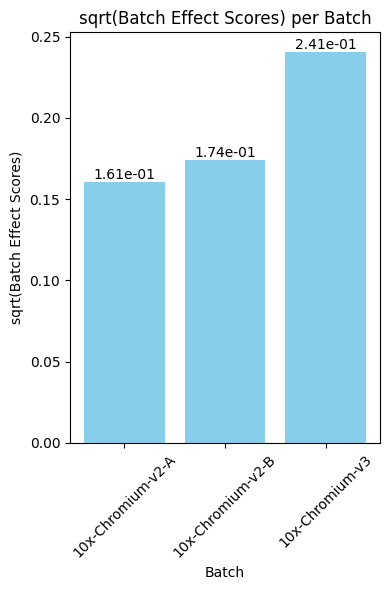

In [16]:
biolucid.visualization.plot_scores_bar(results_df, score_type='Batch Effect Scores', sqrt=True, color='skyblue',figsize=(4, 6))

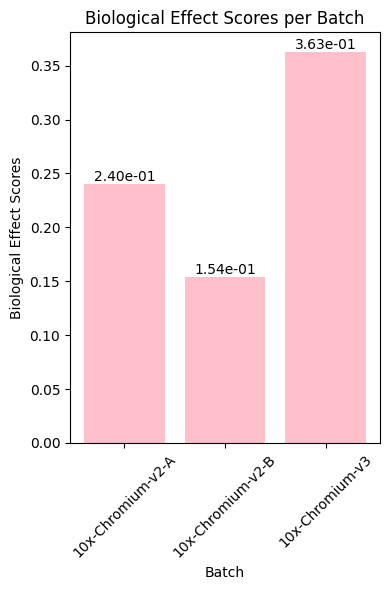

In [17]:
biolucid.visualization.plot_scores_bar(results_df, score_type='Biological Effect Scores', sqrt=False
                    , color='pink',figsize=(4, 6))

# Scatter plot

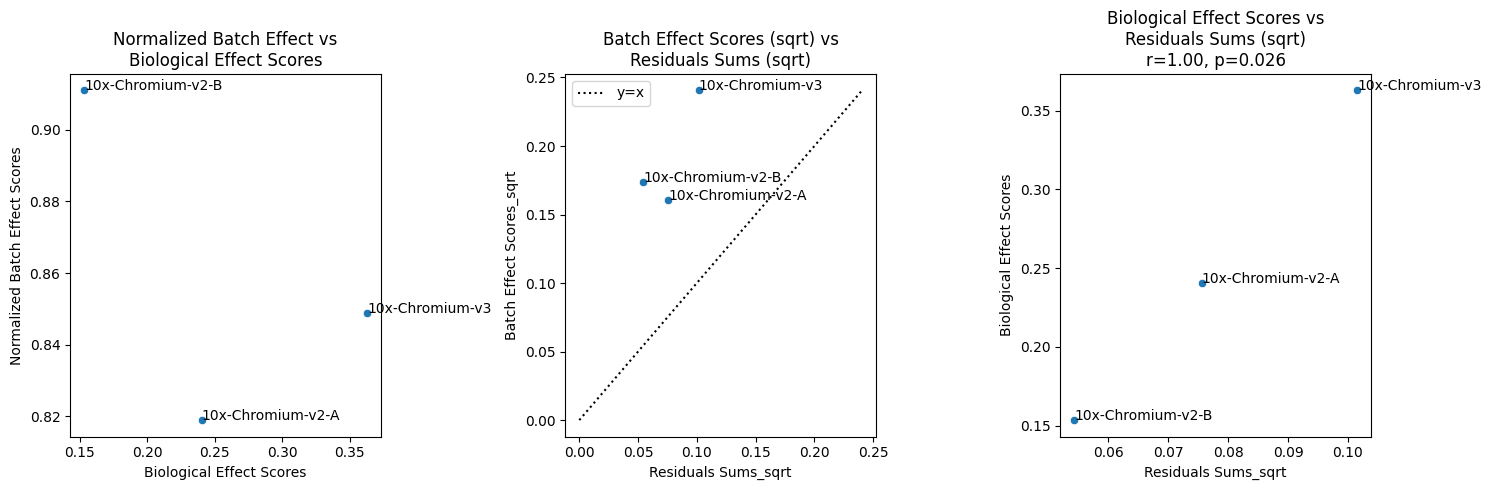

In [18]:
biolucid.visualization.plot_scatter_analysis(results_df)